In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("../data/imputed_type_bangkok_traffy.csv")

In [4]:
df

,Unnamed: 0,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
0,0,2021-9LHDM6,{แสงสว่าง},NaN,ไม่มีภาพ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.48661,13.79386",1867 จรัญสนิทวงศ์ แขวง บางพลัด เขตบางพลัด กรุง...,บางพลัด,บางพลัด,กรุงเทพมหานคร,2021-09-01 10:44:55.353209+00,กำลังดำเนินการ,NaN,NaN,2022-02-22 04:59:58.622268+00
1,1,2021-FYJTFP,{ความสะอาด},เขตบางซื่อ,ขยะเยอะ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53084,13.81865",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-09-03 12:51:09.453003+00,เสร็จสิ้น,NaN,NaN,2022-06-04 15:34:14.609206+00
2,2,2021-8GKAR9,{สายไฟ},ยังไม่มีหน่วยงานรับผิดชอบ,1. เถาวัลย์งอดบนสายไฟ ผมกลัวว่าต่อไปจะเอาออกยา...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.57685,13.79704",335/31 ลาดพร้าว แขวง สามเสนนอก เขตห้วยขวาง กรุ...,สามเสนนอก,ห้วยขวาง,จังหวัดกรุงเทพมหานคร,2021-09-19 06:47:50.488685+00,กำลังดำเนินการ,NaN,NaN,2022-02-22 04:30:07.293416+00
3,3,2021-AFPUXZ,"{ถนน,สะพาน}",NaN,1 ซ่อมทางเท้าหลังคืนพื้นที่จากการปรับปรุงสะพาน...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.52916,13.72338",37 10 ซอย สีลม 9 แขวง สีลม เขตบางรัก กรุงเทพมห...,สีลม,บางรัก,กรุงเทพมหานคร,2021-09-19 07:40:30.000781+00,กำลังดำเนินการ,NaN,NaN,2022-02-22 04:30:04.507406+00
4,4,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}","เขตประเวศ,ฝ่ายโยธา เขตประเวศ",น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.66709,13.67891",189 เฉลิมพระเกียรติ ร.9 แขวง หนองบอน เขต ประเว...,หนองบอน,ประเวศ,กรุงเทพมหานคร,2021-09-19 14:56:08.924992+00,เสร็จสิ้น,4.0,NaN,2022-06-21 08:21:09.532782+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269920,269920,NaN,{คลอง},กรุงเทพโปร่งใส,NaN,https://storage.googleapis.com/traffy_public_b...,NaN,"100.55580,13.72502",NaN,คลองเตย,คลองเตย,กรุงเทพมหานคร,2023-05-11 02:50:30.856774+00,รอรับเรื่อง,NaN,0.0,2023-05-11 02:50:30.847824+00
269921,269921,2023-AY9WFK,{สายไฟ},เขตลาดกระบัง,สายไฟระโยงระยางมากค่ะ ช่วยมาจัดการเรื่องสายไฟด...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.74688,13.74099",2 1 ซอย ร่มเกล้า 25/2 แขวงคลองสามประเวศ เขตลาด...,คลองสามประเวศ,ลาดกระบัง,กรุงเทพมหานคร,2023-05-11 02:50:47.768422+00,รอรับเรื่อง,NaN,0.0,2023-05-11 02:50:47.75879+00
269922,269922,2023-GPURT9,{ถนน},เขตภาษีเจริญ,เทศกิจ ติดป่ายจะย้าย รถ\n\nปัจจุบัน รถเก่าของอ...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.44695,13.73987",49 ถ. บางแวก แขวงบางแวก เขตภาษีเจริญ กรุงเทพมห...,บางแวก,ภาษีเจริญ,กรุงเทพมหานคร,2023-05-11 02:51:44.186578+00,รอรับเรื่อง,NaN,0.0,2023-05-11 02:51:44.173161+00
269923,269923,2023-6BW3WV,{ทางเท้า},เขตจตุจักร,ฟุตบาทชำรุด-สกปรก,https://storage.googleapis.com/traffy_public_b...,NaN,"100.57728,13.80415",1111/5 ถ. ลาดพร้าว แขวงจันทรเกษม เขตจตุจักร กร...,จันทรเกษม,จตุจักร,กรุงเทพมหานคร,2023-05-11 02:52:28.347238+00,รอรับเรื่อง,NaN,0.0,2023-05-11 02:52:28.337167+00


In [5]:
df = df.drop(['organization','comment','photo','photo_after','coords','address','star','count_reopen'],axis=1)

In [6]:
df.head()

,Unnamed: 0,ticket_id,type,subdistrict,district,province,timestamp,state,last_activity
0,0,2021-9LHDM6,{แสงสว่าง},บางพลัด,บางพลัด,กรุงเทพมหานคร,2021-09-01 10:44:55.353209+00,กำลังดำเนินการ,2022-02-22 04:59:58.622268+00
1,1,2021-FYJTFP,{ความสะอาด},NaN,NaN,กรุงเทพมหานคร,2021-09-03 12:51:09.453003+00,เสร็จสิ้น,2022-06-04 15:34:14.609206+00
2,2,2021-8GKAR9,{สายไฟ},สามเสนนอก,ห้วยขวาง,จังหวัดกรุงเทพมหานคร,2021-09-19 06:47:50.488685+00,กำลังดำเนินการ,2022-02-22 04:30:07.293416+00
3,3,2021-AFPUXZ,"{ถนน,สะพาน}",สีลม,บางรัก,กรุงเทพมหานคร,2021-09-19 07:40:30.000781+00,กำลังดำเนินการ,2022-02-22 04:30:04.507406+00
4,4,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}",หนองบอน,ประเวศ,กรุงเทพมหานคร,2021-09-19 14:56:08.924992+00,เสร็จสิ้น,2022-06-21 08:21:09.532782+00


In [7]:
df.isna().sum()

Unnamed: 0          0
ticket_id        2636
type               97
subdistrict        72
district           74
province           25
timestamp           0
state               0
last_activity       0
dtype: int64

In [8]:
df['province'].unique()

array(['กรุงเทพมหานคร', 'จังหวัดกรุงเทพมหานคร', 'นนทบุรี', 'นครปฐม',
       'ศรีสะเกษ', 'สมุทรปราการ', 'เชียงใหม่', 'ปทุมธานี', 'สมุทรสาคร',
       'อ่างทอง', 'ชลบุรี', 'ภูเก็ต', 'ยะลา', 'ลำปาง', 'พระนครศรีอยุธยา',
       'ตาก', 'อุบลราชธานี', 'ฉะเชิงเทรา', 'ขอนแก่น', 'นครศรีธรรมราช',
       'เชียงราย', nan, 'จันทบุรี', 'สงขลา', 'นครราชสีมา', 'ปราจีนบุรี',
       'กาฬสินธุ์', 'พิจิตร', 'อุตรดิตถ์', 'ราชบุรี', 'กาญจนบุรี',
       'ชัยนาท', 'อุทัยธานี', 'สุพรรณบุรี', 'ลพบุรี', 'นครสวรรค์',
       'นครนายก', 'สกลนคร', 'สตูล', 'อุดรธานี', 'เพชรบุรี', 'ตรัง',
       'สุรินทร์', 'อำนาจเจริญ', 'บุรีรัมย์', 'สุโขทัย', 'สุราษฎร์ธานี',
       'พิษณุโลก', 'มหาสารคาม', 'ร้อยเอ็ด', 'แพร่', 'สมุทรสงคราม',
       'สิงห์บุรี', 'ลำพูน', 'ระยอง', 'ยโสธร', 'นครพนม', 'น่าน',
       'หนองบัวลำภู', 'จังหวัดชลบุรี', 'จังหวัดจังหวัด กรุงเทพมหานคร',
       'จังหวัดพระนครศรีอยุธยา', 'จังหวัดสมุทรปราการ', 'จังหวัดLac',
       'จังหวัดฉะเชิงเทรา', 'จังหวัดนนทบุรี', 'จังหวัดBangkok',
       'จังหวัดจังหวัดกรุงเทพม

In [9]:
df = df[df['province'].str.contains('กรุงเทพ|bangkok',na=False,case=False)]

In [10]:
# df[df['type']=='{}'].time.value_counts()

In [11]:
df = df.dropna(subset=['subdistrict', 'district'] )

In [12]:
df.isna().sum()

Unnamed: 0          0
ticket_id        2610
type               97
subdistrict         0
district            0
province            0
timestamp           0
state               0
last_activity       0
dtype: int64

In [13]:
df = df[df['state'].str.contains('เสร็จ',na=False,case=False)]

In [14]:
df.type.unique()

array(['{น้ำท่วม,ร้องเรียน}', '{สะพาน}', '{น้ำท่วม,ถนน}', ...,
       '{ป้าย,จราจร,ถนน,คลอง}',
       '{ร้องเรียน,ความสะอาด,เสียงรบกวน,สัตว์จรจัด}',
       '{ถนน,จราจร,สะพาน,คลอง}'], dtype=object)

In [15]:
df.district.value_counts()

จตุจักร              9917
ประเวศ               8833
บางแค                7791
บางเขน               6848
ลาดกระบัง            6578
บางกะปิ              6522
วัฒนา                6372
คลองเตย              6051
สวนหลวง              5722
บางขุนเทียน          5134
บึงกุ่ม              4870
บางซื่อ              4701
ราชเทวี              4550
ปทุมวัน              4539
ดินแดง               4413
บางกอกน้อย           4326
ลาดพร้าว             4288
สาทร                 4268
บางรัก               4238
วังทองหลาง           4186
พญาไท                4015
ธนบุรี               3960
บางนา                3806
สายไหม               3775
พระนคร               3747
คลองสามวา            3718
มีนบุรี              3547
ห้วยขวาง             3461
บางพลัด              3418
ภาษีเจริญ            3406
หนองจอก              3247
สะพานสูง             3245
พระโขนง              3183
หลักสี่              3178
ดอนเมือง             3137
จอมทอง               3135
ตลิ่งชัน             2859
ทุ่งครุ              2720
หนองแขม     

In [16]:
df[['subdistrict','district']]

,subdistrict,district
4,หนองบอน,ประเวศ
10,ยานนาวา,สาทร
25,ลาดพร้าว,ลาดพร้าว
64,ลาดพร้าว,ลาดพร้าว
102,ดุสิต,ดุสิต
...,...,...
269635,บางยี่ขัน,บางพลัด
269653,วงศ์สว่าง,บางซื่อ
269656,วงศ์สว่าง,บางซื่อ
269660,วงศ์สว่าง,บางซื่อ


In [17]:
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df['last_activity'] = pd.to_datetime(df['last_activity'], utc=True)

In [18]:
df['month'] = df['timestamp'].dt.month

# Extract the year
df['year'] = df['timestamp'].dt.year

# Extract the quarter of the year
df['quarter'] = df['timestamp'].dt.quarter

df['is_weekend'] = df['timestamp'].apply(lambda x: x.dayofweek >= 5)
df['is_weekend'] = df['is_weekend'].astype(int)

In [19]:
df['time'] =  (df['last_activity'] - df['timestamp']).dt.days

In [20]:
type_con = df['type'].str.strip('{}').str.get_dummies(',')

In [21]:
df = pd.concat([df,type_con],axis=1)

In [22]:
district_hot =  pd.get_dummies(df['district'])

In [23]:
df = pd.concat([df,district_hot],axis=1)

In [24]:
df = df.drop(['ticket_id','type','subdistrict','district','province','timestamp','state','last_activity'],axis=1)

In [25]:
df[['time']].describe()

,time
count,201728.000000
mean,43.101880
std,69.399017
min,0.000000
25%,1.000000
50%,8.000000
75%,52.000000
max,464.000000


In [26]:
Q1 = df['time'].quantile(0.25)
Q3 = df['time'].quantile(0.75)
IQR = Q3 - Q1
min_value = Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
df['time'] = df['time'].clip(lower=min_value, upper=max_value)

#df = df.query('(@Q1 - 1.5 * @IQR) <= time <= (@Q3 + 1.5 * @IQR)')

In [27]:
df['time'].describe()

count    201728.000000
mean         33.401067
std          45.602603
min           0.000000
25%           1.000000
50%           8.000000
75%          52.000000
max         128.500000
Name: time, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

df_train, df_rem = train_test_split(df, test_size=0.3, random_state=42)

df_val, df_test = train_test_split(df_rem, test_size=0.5, random_state=42)


In [29]:
# Q1 = df_train['time'].quantile(0.25)
# Q3 = df_train['time'].quantile(0.75)
# IQR = Q3 - Q1
# df_train = df_train.query('(@Q1 - 1.5 * @IQR) <= time <= (@Q3 + 1.5 * @IQR)')

In [30]:
y_train = df_train['time']
X_train = df_train.drop(['time'], axis = 1)
X_train

,Unnamed: 0,month,year,quarter,is_weekend,PM2.5,การเดินทาง,กีดขวาง,คนจรจัด,คลอง,...,วัฒนา,สวนหลวง,สะพานสูง,สัมพันธวงศ์,สาทร,สายไหม,หนองจอก,หนองแขม,หลักสี่,ห้วยขวาง
235701,235701,3,2023,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7984,7984,6,2022,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74991,74991,7,2022,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
161514,161514,10,2022,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173287,173287,11,2022,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149892,149892,9,2022,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130039,130039,8,2022,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165278,165278,10,2022,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185307,185307,12,2022,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
y_val = df_val['time']
X_val = df_val.drop(['time'], axis = 1)
X_val

,Unnamed: 0,month,year,quarter,is_weekend,PM2.5,การเดินทาง,กีดขวาง,คนจรจัด,คลอง,...,วัฒนา,สวนหลวง,สะพานสูง,สัมพันธวงศ์,สาทร,สายไหม,หนองจอก,หนองแขม,หลักสี่,ห้วยขวาง
148531,148531,9,2022,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
66429,66429,7,2022,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208839,208839,1,2023,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83225,83225,7,2022,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71377,71377,7,2022,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123006,123006,8,2022,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13535,13535,6,2022,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69888,69888,7,2022,3,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
65444,65444,7,2022,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_test = df_test['time']
X_test = df_test.drop(['time'], axis = 1)
X_test

,Unnamed: 0,month,year,quarter,is_weekend,PM2.5,การเดินทาง,กีดขวาง,คนจรจัด,คลอง,...,วัฒนา,สวนหลวง,สะพานสูง,สัมพันธวงศ์,สาทร,สายไหม,หนองจอก,หนองแขม,หลักสี่,ห้วยขวาง
7644,7644,6,2022,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94766,94766,7,2022,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
108751,108751,8,2022,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1880,1880,5,2022,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
165506,165506,10,2022,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50252,50252,6,2022,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72852,72852,7,2022,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
231342,231342,3,2023,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245765,245765,3,2023,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [34]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [35]:
# !pip install xgboost
import xgboost


In [36]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [37]:
#model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [38]:
from numpy import absolute
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# scores = absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [39]:
# expected_y  = y_val
# predicted_y = model.predict(X_val)

In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:tweedie'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7, 9],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}

In [43]:
xgb1 = XGBRegressor()

In [44]:
parameters = {'nthread':[4],
              'objective':['reg:pseudohubererror'],
              'learning_rate': [0.05, 0.07, 0.1, 0.3],
              'max_depth': [7, 9, 10, 12],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [45]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=2)

xgb_grid.fit(X_train,
         y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.05, 0.07, 0.1, 0.3],
                         'max_depth': [5, 6, 7, 9, 10], 'n_estimators': [500],
                         'nthread': [4], 'objective': ['reg:pseudohubererror'],
                         'subsample': [0.7]},
             verbose=2)

In [46]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.28496397855031547
{'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:pseudohubererror', 'subsample': 0.7}


In [47]:
model = XGBRegressor(**xgb_grid.best_params_)

In [48]:
model.fit(X_train, y_train)
print(); print(model)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, nthread=4, num_parallel_tree=None,
             objective='reg:pseudohubererror', ...)


[0.02395994 0.01097684 0.09563605 0.00344904 0.00269343 0.00108269
 0.00136129 0.00725469 0.00161285 0.0039202  0.00297905 0.01599681
 0.01578457 0.0224516  0.00514699 0.00977994 0.01060438 0.01190474
 0.01025889 0.00184833 0.00267035 0.00219817 0.00374778 0.0064955
 0.05352502 0.00146493 0.00156171 0.00261072 0.02704844 0.00599976
 0.00799205 0.01652913 0.00312145 0.02987787 0.00825895 0.00835421
 0.0050729  0.00478922 0.00597164 0.00621279 0.00480615 0.00587736
 0.03588841 0.0074819  0.00490096 0.00547596 0.01471682 0.01347998
 0.00547067 0.00931515 0.00426879 0.0686089  0.0131476  0.01303748
 0.01589967 0.00906373 0.01397526 0.00716264 0.01929661 0.0051495
 0.00576153 0.00960677 0.00718749 0.00690292 0.0099793  0.01283276
 0.00801966 0.00792552 0.00916754 0.0160492  0.086155   0.02570922
 0.00526271 0.00621698 0.00970692 0.01591502 0.00408192 0.00788035
 0.00641065]


c:\Users\pacha\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\pacha\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\pacha\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\pacha\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\pacha\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:

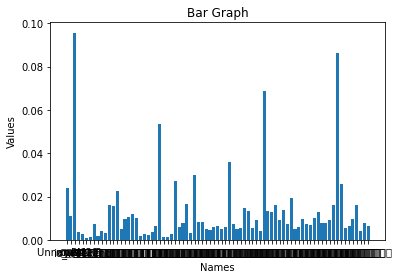

In [49]:
print(model.feature_importances_)
col = X_train.columns

# Plotting the bar graph
plt.bar(col, model.feature_importances_)

# Adding labels and title
plt.xlabel('Names')
plt.ylabel('Values')
plt.title('Bar Graph')

# Displaying the graph
plt.show()






In [50]:
for i in range(len(col)):
    if(model.feature_importances_[i] >= 0.02):
        print(col[i], model.feature_importances_[i])

Unnamed: 0 0.023959937
year 0.09563605
ต้นไม้ 0.022451596
สายไฟ 0.05352502
แสงสว่าง 0.027048437
จตุจักร 0.029877873
บางกอกน้อย 0.035888415
บางรัก 0.0686089
สวนหลวง 0.086155
สะพานสูง 0.025709217


In [64]:
y_test.describe()

count    30260.000000
mean        33.190433
std         45.459088
min          0.000000
25%          1.000000
50%          8.000000
75%         51.000000
max        128.500000
Name: time, dtype: float64

In [51]:
y_true = y_train
y_pred = model.predict(X_train)

In [52]:
expected_y  = y_test
predicted_y = model.predict(X_test)

0.293055930740143
22.48905595360042
9139517301743644.0


c:\Users\pacha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time'>

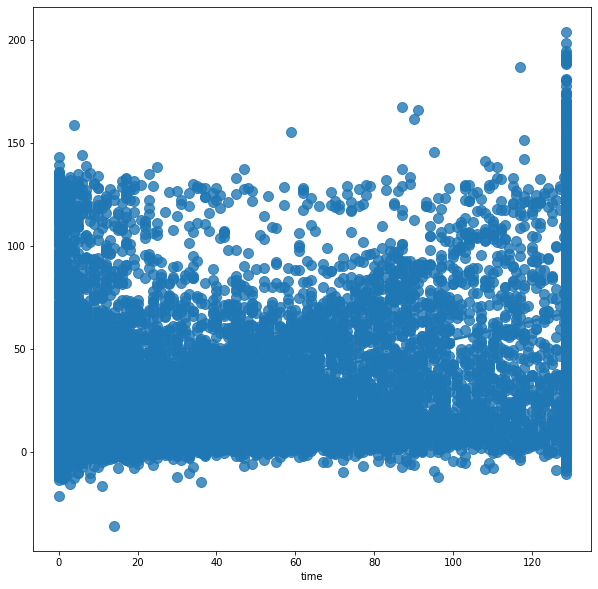

In [53]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_absolute_error(expected_y, predicted_y))
print(metrics.mean_absolute_percentage_error(expected_y, predicted_y))


plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})



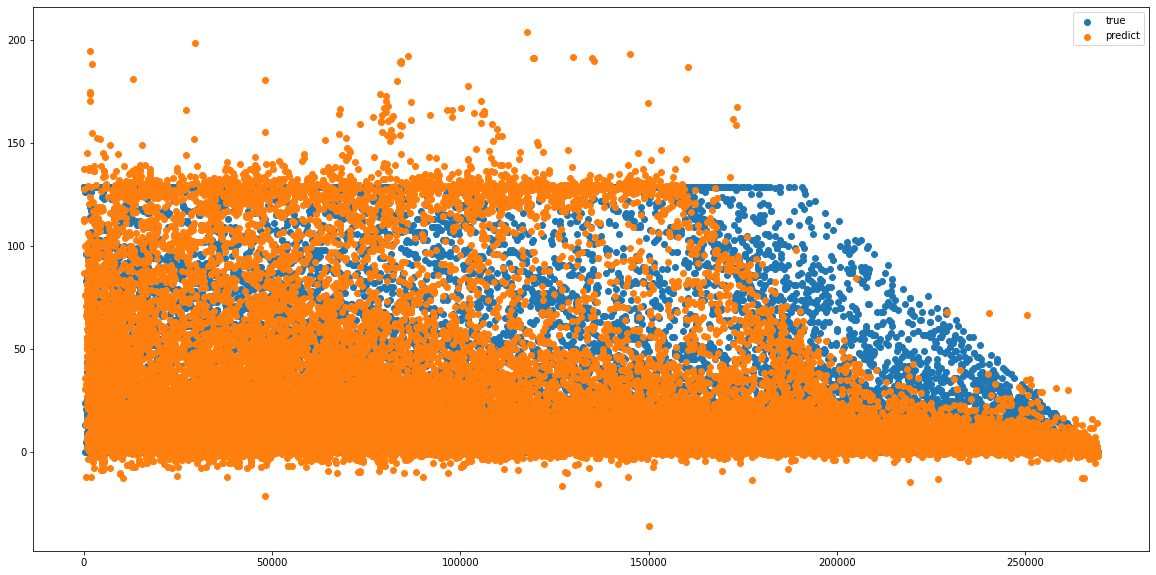

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(x = expected_y.index, y = expected_y, label = "true")
plt.scatter(x = expected_y.index, y = predicted_y, label = "predict")

plt.legend()
plt.show()

In [55]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_absolute_error(expected_y, predicted_y))
print(metrics.mean_absolute_percentage_error(expected_y, predicted_y))

0.293055930740143
22.48905595360042
9139517301743644.0


In [60]:
train_mae = metrics.mean_absolute_error(y_true, y_pred)
train_mse = metrics.mean_absolute_error(y_true, y_pred)
print(f'Train MAE: {train_mae:.4f}')
# print(f'Train MSE: {train_mse:.4f}')
test_mae = metrics.mean_absolute_error(expected_y, predicted_y)
test_mse = metrics.mean_squared_error(expected_y, predicted_y)
print(f'Test MAE: {test_mae:.4f}')
# print(f'Test MSE: {test_mse:.4f}')

Train MAE: 20.6830
Test MAE: 22.4891


# MLflow

In [57]:
import mlflow.xgboost
import mlflow
from mlflow.models.signature import infer_signature


In [58]:
signature = infer_signature(X_train, model.predict(X_train))

c:\Users\pacha\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\models\signature.py:137: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)


In [59]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')  # set up connection
mlflow.set_experiment('time_teller')
with mlflow.start_run() as run:
    mlflow.xgboost.log_model(model, "model",signature=signature)
model_uri = "runs:/{}/model".format(run.info.run_id)
model = mlflow.xgboost.load_model(model_uri)
model

KeyboardInterrupt: 

In [ ]:
import requests
import json

In [ ]:
test_flow = X_test.iloc[-2:-1]
test_flow

,Unnamed: 0,month,year,quarter,is_weekend,PM2.5,การเดินทาง,กีดขวาง,คนจรจัด,คลอง,...,วัฒนา,สวนหลวง,สะพานสูง,สัมพันธวงศ์,สาทร,สายไหม,หนองจอก,หนองแขม,หลักสี่,ห้วยขวาง
245765,245765,3,2023,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#test_flow.to_dict('split')

In [ ]:
def predict_json(server_url, input_json):
    response = requests.post(server_url, json=input_json)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Request failed with status code: %s, response: %s"
                        % (response.status_code, response.text))
    
def predict(server_url, df):
    # print(inputs)
    #inputs = test_flow
    #data = {"dataframe_split": df.to_dict(orient='split')}
    data = {"dataframe_records": df.to_dict(orient='records')}

    # data = df.to_json(orient='records')
    #data = {"inputs":inputs.numpy().tolist()}
    # print(data)
    #data = df
    
    
    
    return predict_json(server_url, data)

# test_flow = X_test.iloc[-2:-1]
test_flow = X_test
predict_result = predict("http://127.0.0.1:1245/invocations", test_flow)
predict_result

{'predictions': [96.3755874633789,
  24.213918685913086,
  1.830628752708435,
  48.04668426513672,
  15.642372131347656,
  19.1829833984375,
  4.19405460357666,
  15.676079750061035,
  11.988245010375977,
  65.39312744140625,
  23.945615768432617,
  14.267708778381348,
  12.282883644104004,
  33.78969192504883,
  1.890722393989563,
  1.1875805854797363,
  5.759302139282227,
  13.72312068939209,
  94.67745208740234,
  11.777190208435059,
  -0.6348388195037842,
  3.241957902908325,
  30.906139373779297,
  96.18003845214844,
  10.603343963623047,
  7.006333827972412,
  19.454320907592773,
  11.181023597717285,
  4.997385501861572,
  90.12173461914062,
  14.982290267944336,
  6.808357238769531,
  10.547602653503418,
  9.929235458374023,
  4.916299819946289,
  47.96108627319336,
  4.576201915740967,
  13.529183387756348,
  21.634536743164062,
  91.1740951538086,
  5.907454490661621,
  24.647607803344727,
  22.192218780517578,
  1.7813539505004883,
  8.035372734069824,
  7.3064775466918945,
